In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df_data = pd.read_csv('netflix1.csv')   
df_data.head()    

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
df_data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [4]:
# Gereksiz sütünları siler
df_data.drop('show_id', axis=1,inplace=True)

In [5]:
df_data.describe() 

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
df_data.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8790 non-null   object
 1   title         8790 non-null   object
 2   director      8790 non-null   object
 3   country       8790 non-null   object
 4   date_added    8790 non-null   object
 5   release_year  8790 non-null   int64 
 6   rating        8790 non-null   object
 7   duration      8790 non-null   object
 8   listed_in     8790 non-null   object
dtypes: int64(1), object(8)
memory usage: 618.2+ KB


In [7]:
# Boş değer var mı?
df_data.isnull().sum().any()

False

In [8]:
# Yinelenen verilerin toplamı
df_data.duplicated().sum()

3

In [9]:
# Serideki benzersiz değerlerin sayısı
df_data.nunique()

type               2
title           8787
director        4528
country           86
date_added      1713
release_year      74
rating            14
duration         220
listed_in        513
dtype: int64

In [10]:
# Hangi ülke daha çok üretiyor?
df_data['country'].value_counts()
# Amerika Birleşik Devletleri en büyük üretime sahip

United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: country, Length: 86, dtype: int64

In [11]:
df_data['release_year'].value_counts()
# Yapımların çoğu 2018'deydi.

2018    1146
2017    1030
2019    1030
2020     953
2016     901
        ... 
1966       1
1959       1
1925       1
1947       1
1961       1
Name: release_year, Length: 74, dtype: int64

In [12]:
df_data['rating'].value_counts()
# İncelemelerin çoğu TV-MA'dır

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [13]:
df_data['duration'].value_counts()
# En çok üretim 1 sezonda

1 Season      1791
2 Seasons      421
3 Seasons      198
90 min         152
97 min         146
              ... 
5 min            1
16 min           1
186 min          1
193 min          1
11 Seasons       1
Name: duration, Length: 220, dtype: int64

In [14]:
df_data['listed_in'].value_counts()
# En fazla sınıflandırma Dramas, International Movies

Dramas, International Movies                                362
Documentaries                                               359
Stand-Up Comedy                                             334
Comedies, Dramas, International Movies                      274
Dramas, Independent Movies, International Movies            252
                                                           ... 
Anime Features                                                1
Action & Adventure, Horror Movies, Independent Movies         1
Action & Adventure, Classic Movies, International Movies      1
Cult Movies, Independent Movies, Thrillers                    1
Classic & Cult TV, Crime TV Shows, TV Dramas                  1
Name: listed_in, Length: 513, dtype: int64

In [15]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8790 non-null   object
 1   title         8790 non-null   object
 2   director      8790 non-null   object
 3   country       8790 non-null   object
 4   date_added    8790 non-null   object
 5   release_year  8790 non-null   int64 
 6   rating        8790 non-null   object
 7   duration      8790 non-null   object
 8   listed_in     8790 non-null   object
dtypes: int64(1), object(8)
memory usage: 618.2+ KB


In [16]:
df_data.drop_duplicates(subset=None,keep='first',inplace=True)
df_data.duplicated().sum()

0

In [17]:
country = df_data.groupby(['country','type'])['type'].count().sort_values().reset_index(name='count')
country
# Amerika Birleşik Devletleri'ndeki çoğu prodüksiyon Filmlerdir
# Birleşik Krallık'taki çoğu prodüksiyon filmdir
# Hindistan'daki çoğu prodüksiyon Filmlerdir

,country,type,count
0,Zimbabwe,Movie,1
1,Cyprus,TV Show,1
2,Czech Republic,TV Show,1
3,Soviet Union,Movie,1
4,Somalia,Movie,1
...,...,...,...
133,Pakistan,TV Show,349
134,United Kingdom,Movie,387
135,United States,TV Show,845
136,India,Movie,975


In [18]:
cu =  df_data.groupby(['country','listed_in'])['listed_in'].count().sort_values().reset_index(name='count')
cu
# Amerika Birleşik Devletleri'ndeki çoğu prodüksiyon: Belgeseller ve Stand-Up Komedisi
# Hindistan'daki çoğu prodüksiyon: Dramalar, Uluslararası Filmler ve Komediler

,country,listed_in,count
0,Argentina,"Action & Adventure, Comedies, International Mo...",1
1,Pakistan,"Anime Series, International TV Shows, TV Thril...",1
2,Pakistan,"Anime Series, International TV Shows, Romantic...",1
3,Pakistan,"Anime Series, Crime TV Shows, International TV...",1
4,Pakistan,"Anime Features, Documentaries",1
...,...,...,...
2015,India,"Dramas, International Movies",122
2016,United States,"Children & Family Movies, Comedies",122
2017,India,"Comedies, Dramas, International Movies",124
2018,United States,Stand-Up Comedy,216


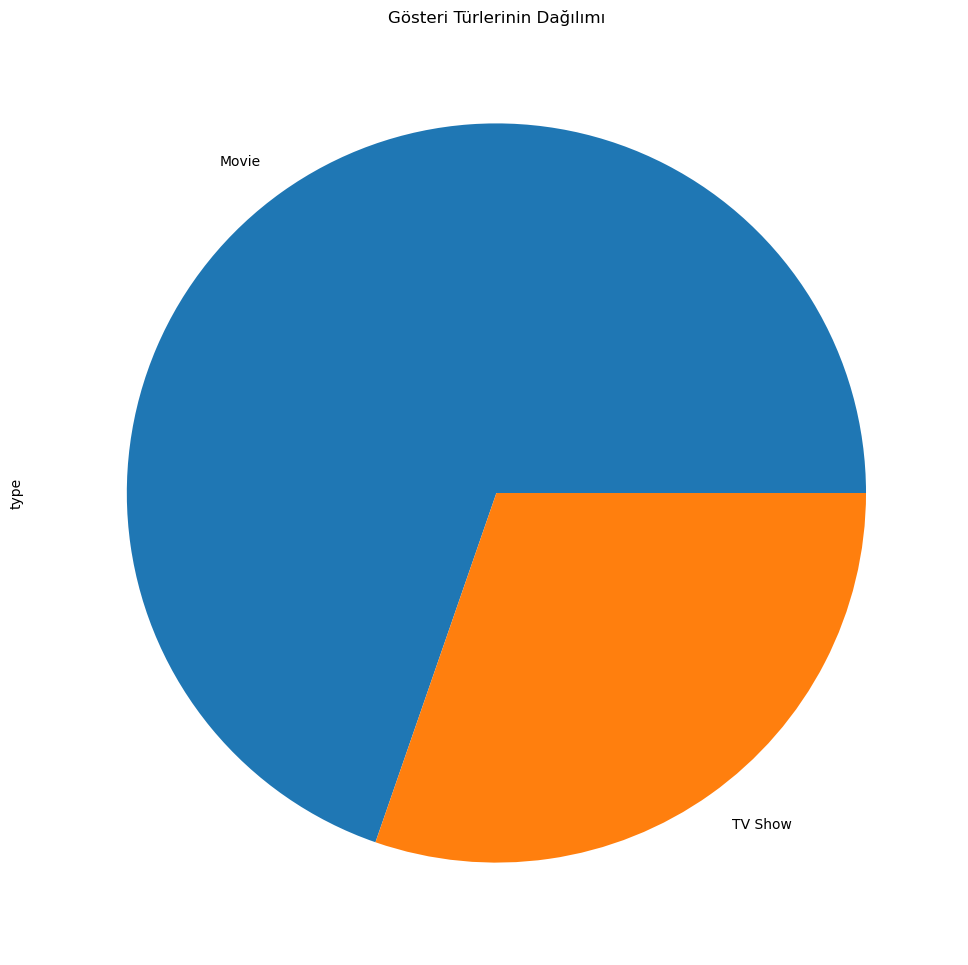

In [19]:
plt.figure(figsize=(15,12))
df_data['type'].value_counts().plot.pie()
plt.title('Gösteri Türlerinin Dağılımı')
plt.show()

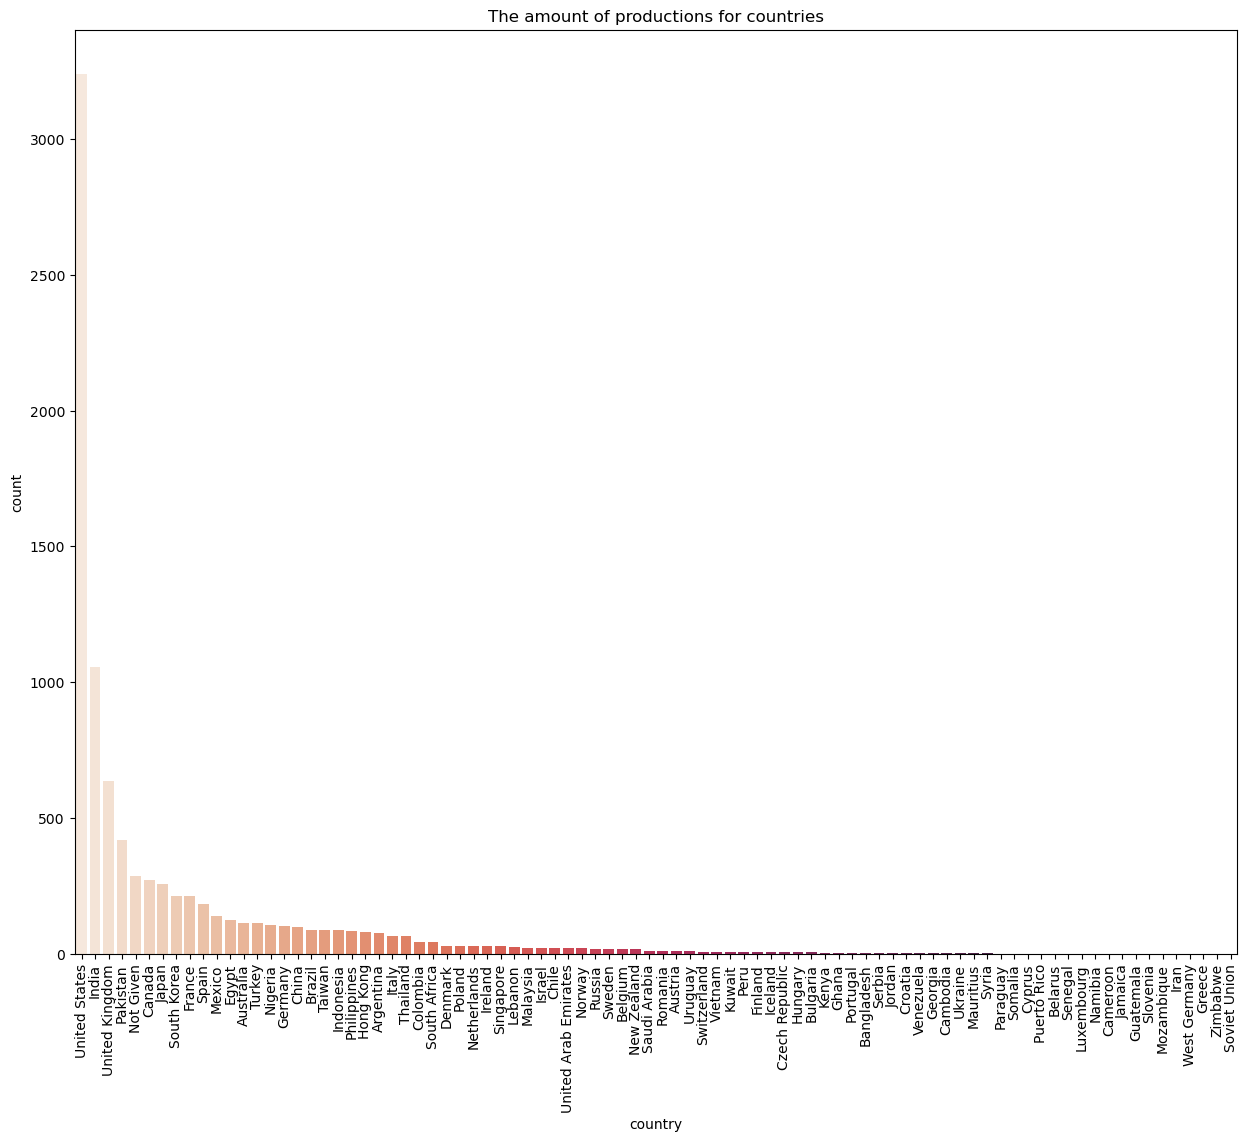

In [20]:
plt.figure(figsize=(15,12))
sns.countplot(x='country',data=df_data,palette='rocket_r',order=df_data['country'].value_counts().index)
plt.xticks(rotation=90)
plt.title('The amount of productions for countries')
plt.show()
# En çok üretim yapılan ülkeler : united states , india , united kingdom

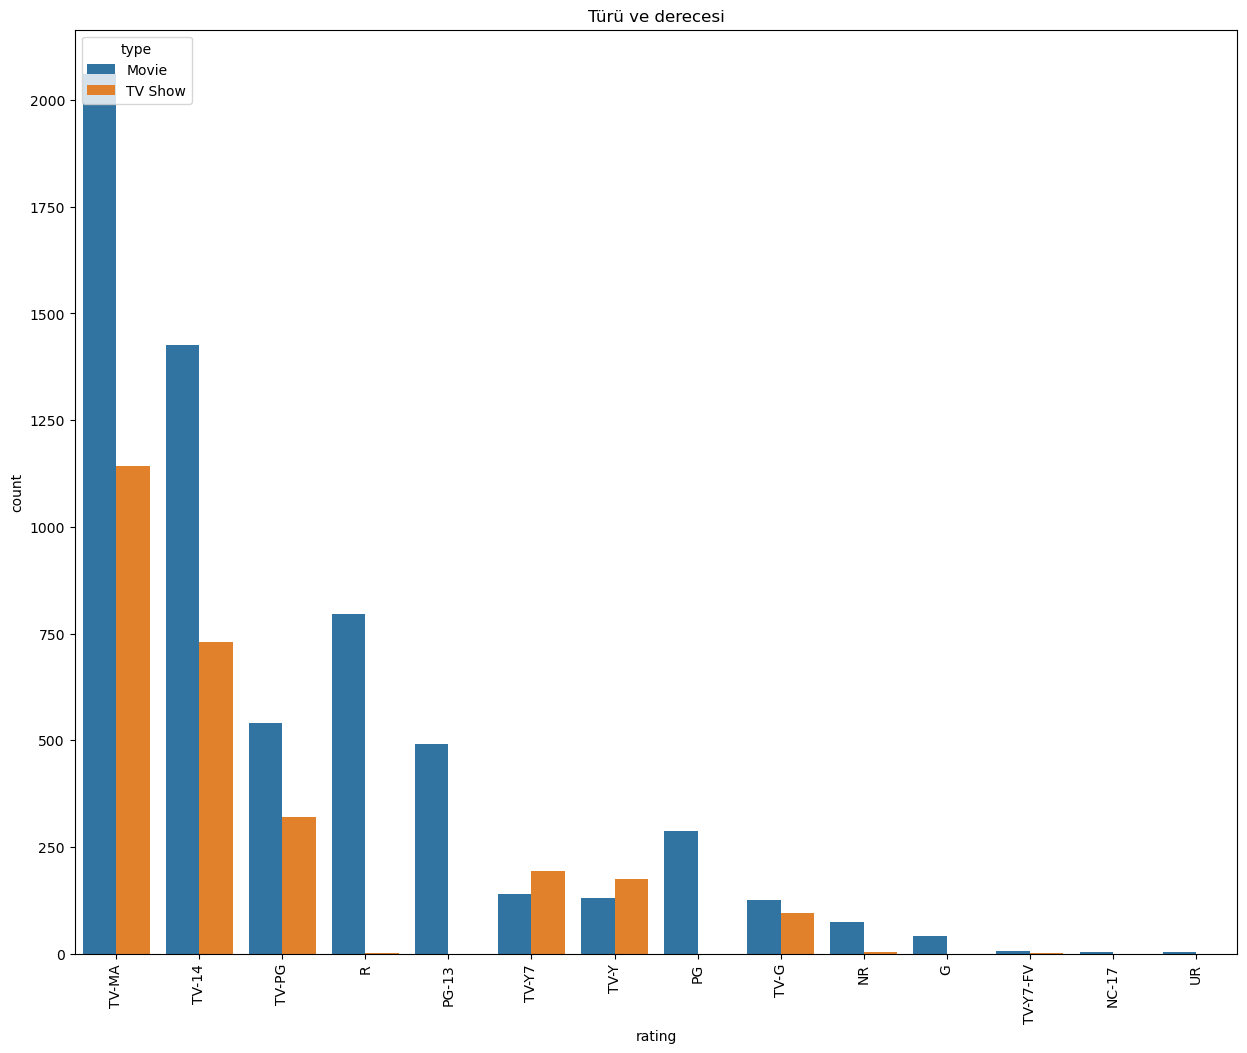

In [21]:
plt.figure(figsize=(15,12))
sns.countplot(x='rating',data=df_data,hue='type',order=df_data['rating'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Türü ve derecesi')
plt.show()

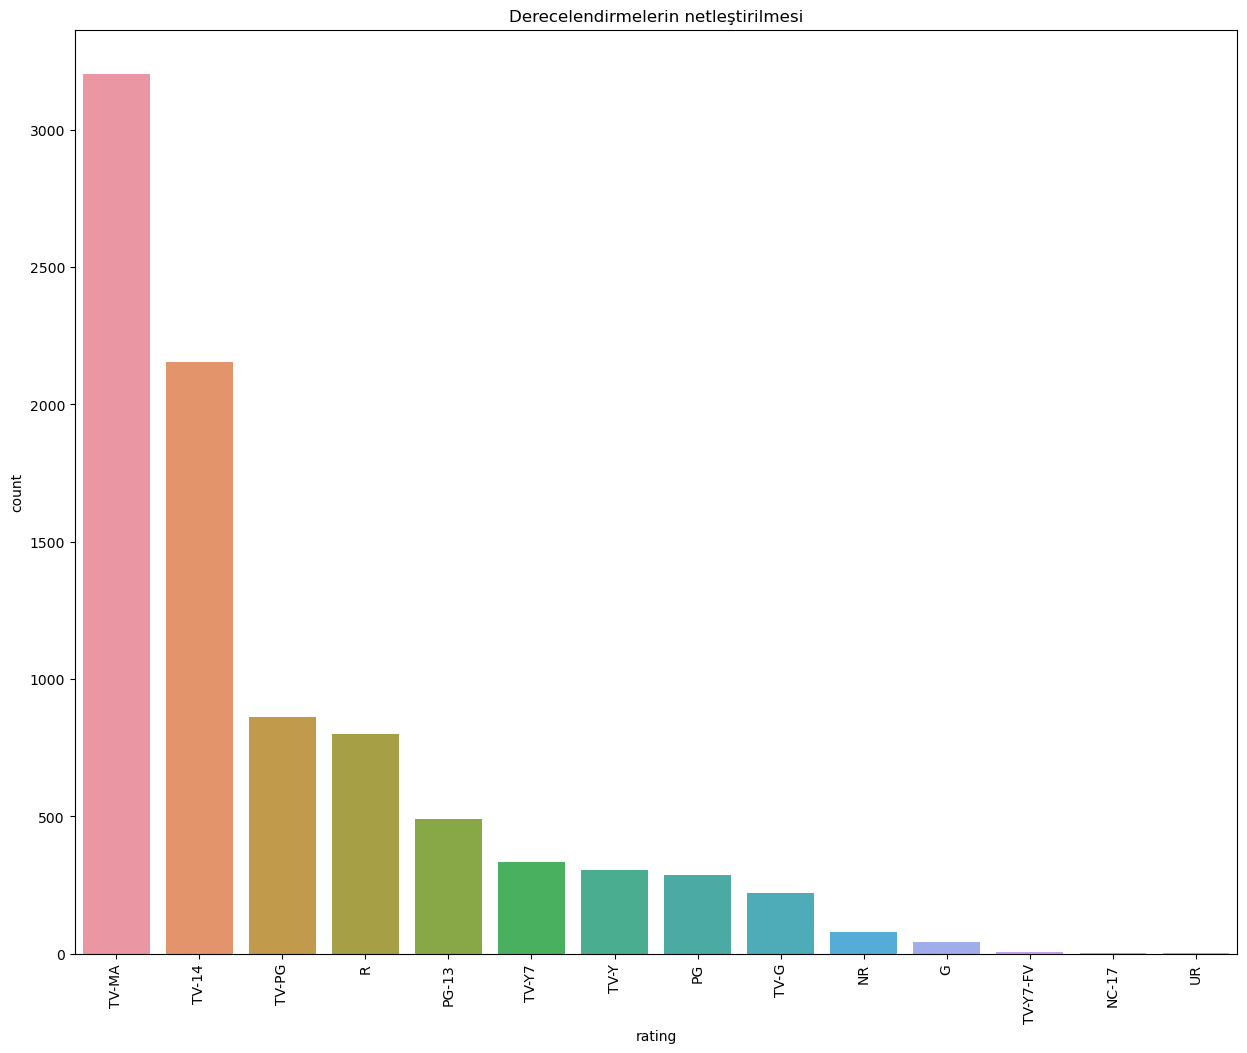

In [22]:
 plt.figure(figsize=(15,12))
sns.countplot(x='rating',data=df_data,order=df_data['rating'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Derecelendirmelerin netleştirilmesi')
plt.show()
# 3205 şovu Yetişkin İzleyiciler içindir ve 2157 14 yaş üstü içindir

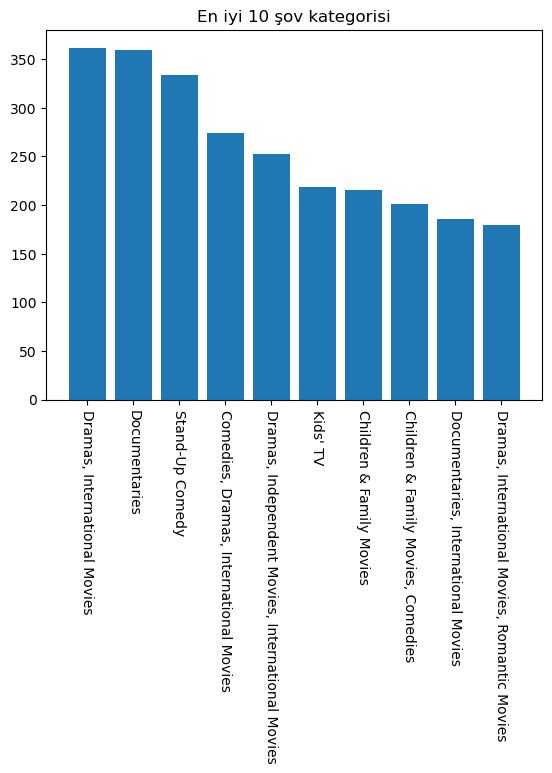

In [23]:
top10_rating = df_data['listed_in'].value_counts().head(10)
plt.bar(top10_rating.index, top10_rating.values)
plt.title('En iyi 10 şov kategorisi')
plt.xticks(rotation=-90) 
plt.show()

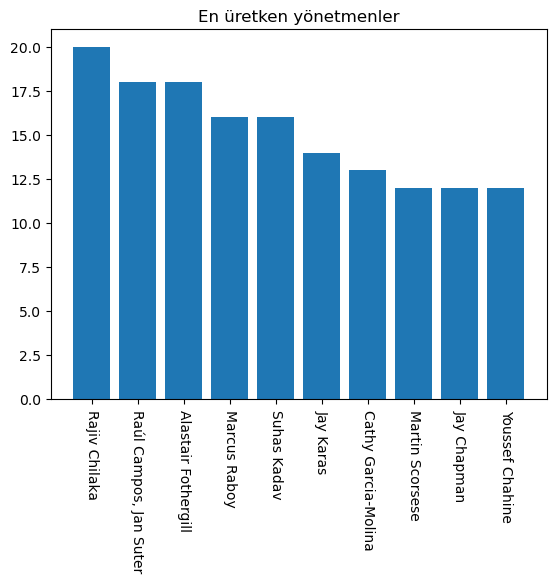

In [24]:
top10_director = df_data['director'].value_counts().drop("Not Given").head(10)
plt.bar(top10_director.index, top10_director.values)
plt.title('En üretken yönetmenler')
plt.xticks(rotation=-90) 
plt.show()

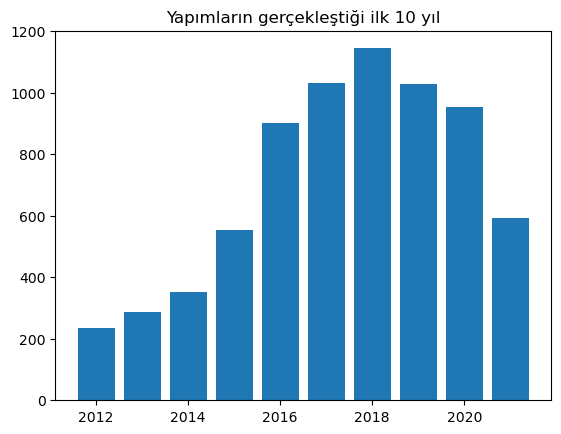

In [25]:
top10_years = df_data['release_year'].value_counts().head(10)
plt.bar(top10_years.index, top10_years.values)
plt.title('Yapımların gerçekleştiği ilk 10 yıl')
plt.show()

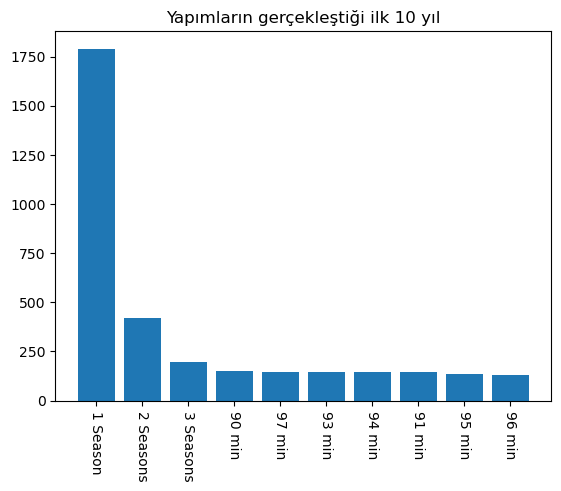

In [26]:
top10_duration = df_data['duration'].value_counts().head(10)
plt.bar(top10_duration.index, top10_duration.values)
plt.title('Yapımların gerçekleştiği ilk 10 yıl')
plt.xticks(rotation=-90)
plt.show()

## Bir yılda en çok film çeken yönetmen hangisi?

C:\Users\ABRA\AppData\Local\Temp\ipykernel_12780\3516148135.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['director'], rotation=90)


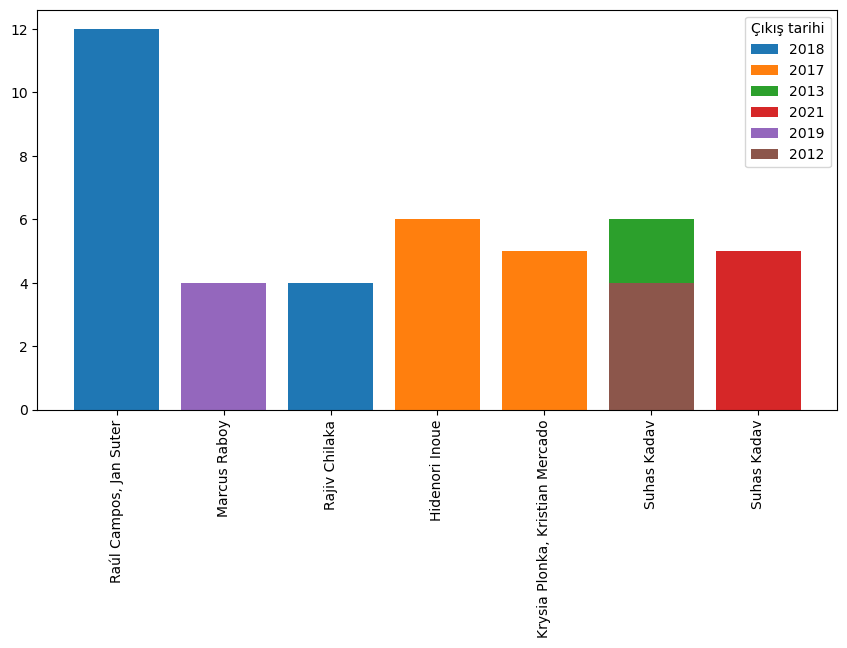

In [27]:
df = df_data.groupby(['director','release_year'])['release_year'].count().drop("Not Given").sort_values(ascending=False).reset_index(name='count').head(10)
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0.1,.1,.8,.8])

for year in df['release_year'].unique():
    df_year = df[df['release_year'] == year]
    ax.bar(df_year['director'], df_year['count'], label=year)
ax.set_xticklabels(df['director'], rotation=90)
ax.legend(title='Çıkış tarihi')
plt.show()

In [28]:
df

,director,release_year,count
0,"Raúl Campos, Jan Suter",2018,12
1,Marcus Raboy,2017,6
2,Rajiv Chilaka,2013,6
3,Hidenori Inoue,2017,5
4,"Krysia Plonka, Kristian Mercado",2021,5
5,Suhas Kadav,2018,4
6,Suhas Kadav,2019,4
7,Rajiv Chilaka,2012,4
8,Justin G. Dyck,2018,4
9,Suhas Kadav,2017,4
